# Task 1. Address Feedback 


<img src="../images/Feedback.png">

The way to adress this feedback is to re-do the research question, however with more suitable charts.

## Load Data



In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context(font_scale=1.5)
sns.set_style("darkgrid")

from scripts import project_functions 


df = project_functions.load_and_process('../data/raw/FIFA21_official_data.csv')

## Research questions 

1. How does the average highest stat for ST compares against all players ST average highest stat by best position? Is there a position who is better?

2. Is there a general decline in stamina for older players?

3. Does higher weight always mean higher strength on average for each general position?

## Research question #1

To first answer this first question we must drop all variable that do not involve calculations for this question. Then we must isolate the ST position and find its highest average stat.


In [2]:
dfr1 = df.copy()
dfr1 = dfr1.drop(dfr1.columns[0:10], axis = 1) 
dfr1 = dfr1.drop(dfr1.columns[36], axis = 1) 
dfr1 = dfr1.drop(dfr1.columns[35], axis = 1)
dfr1GroupSt = dfr1
dfr1GroupSt = dfr1GroupSt[dfr1GroupSt["BestPosition"].str.contains('ST')]
dfr1GroupSt = dfr1GroupSt.groupby('BestPosition').mean()
dfr1GroupSt['Max'] = dfr1GroupSt.idxmax(axis=1)
dfr1GroupSt['Max'] 


BestPosition
ST    Positioning
Name: Max, dtype: object

After dicovering that positioning is the highest average stat for ST, we can find the mean of that stat for all positions and assign it to a df, so the graph is sorted by the positioning stat and we can illustrate the mean in a histogram graph

In [3]:
orderGraph = dfr1.groupby('BestPosition')['Positioning'].mean().reset_index()
orderGraph=orderGraph.sort_values('Positioning', ascending=False)
orderGraph=orderGraph.reset_index(drop= True)
orderGraph

,BestPosition,Positioning
0,CF,81.275862
1,ST,80.899225
2,RW,78.000000
3,LW,77.676471
4,CAM,75.336879
5,RM,74.588710
6,LM,74.417582
7,CM,72.345029
8,RWB,70.785714
9,LWB,67.904762


After we have the ordering by  average we can start doing data vizualizations. For this research question we will do a boxplot and a histogram. These are the best plots to analyze a value by each type the data has. It will help us understand the quantity of data, the statistical summary of the data, and where are the players generally located, also it will help us locate on average how good the average players on a certain position are at positioning.

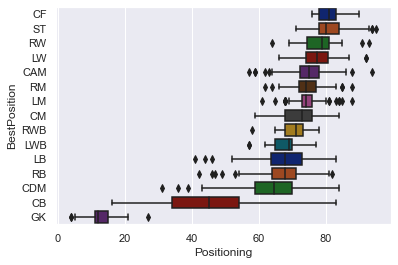

In [4]:
ax = sns.boxplot(
    data=dfr1,
    x="Positioning", y="BestPosition", palette="dark", order=orderGraph['BestPosition'])


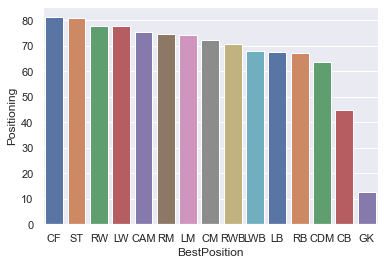

In [5]:
ax = sns.barplot(data = orderGraph, x="BestPosition", y="Positioning", palette="deep")


## Research question #2


To first answer this second question we must group the data by Age based on the average stamina. Then we can output the result to show a general idea of how the data looks like.



In [6]:
dfr2 = df.copy()
dfr2 = dfr2.groupby('Age')['Stamina'].mean().reset_index()

After we have the data grouped by the average we can start doing data vizualizations. For this research question we will do a lineplot, a regression plot and a jointplot. These are the best plots to analyze the trend of two values. It will help us understand the overall movement of the data with its ranges, the trend of the data, and where is the most concentration of players comparing these two data values.

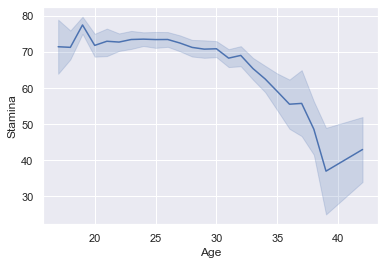

In [7]:
ax = sns.lineplot(x="Age", y="Stamina",
              data=df)

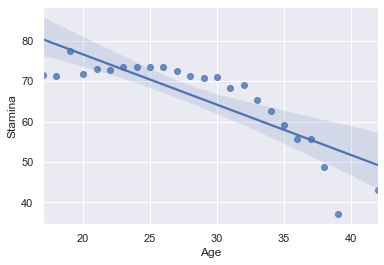

In [8]:
ax = sns.regplot(x="Age", y="Stamina",
              data=dfr2)

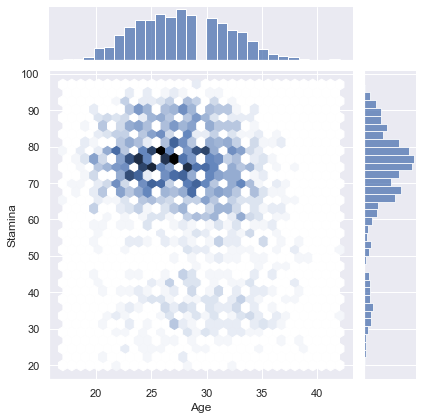

In [9]:
ax = sns.jointplot(x="Age", y="Stamina",
              data=df, kind = "hex")

## Research question #3

To first answer this third question we must do some data wrangling on Weight so it can be processed as a numerical value in seaborn. Then we must group the data by weight and general position based by strength. Then we sort by strength to see how is that comparing to weight. Then we can output the result to show a general idea of how the data looks like.

In [10]:
dfr3 = df
dfr3['Weight'] = dfr3['Weight'].str.strip("lbs")
dfr3['Weight'] = dfr3['Weight'].apply(pd.to_numeric)
dfr3 = dfr3.groupby(['Weight','GeneralPosition'])['Strength'].mean().reset_index()
dfr3 = dfr3.sort_values('Strength', ascending=False).reset_index(drop=True)

After we have the data grouped by the average Strength we can start doing data vizualizations. For this research question we will do a lineplot and regressions plot. These are the best plots to analyze the trend of two values factored by an external value. It will help us understand the overall movement of the data with its ranges by each positio and the trend of the data by each position.

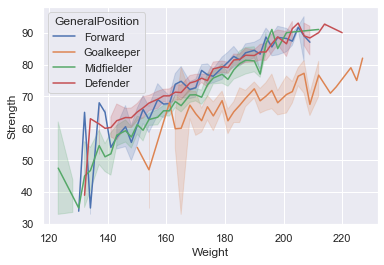

In [11]:
ax = sns.lineplot(x="Weight", y="Strength", hue = 'GeneralPosition',
              data=df)

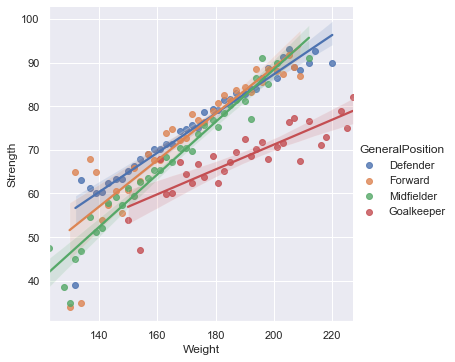

In [12]:
ax = sns.lmplot(x="Weight", y="Strength",hue = 'GeneralPosition',
              data=dfr3)

## Summary and conclusions

- Research Question 1: How does the average highest stat for ST compares against all players ST average highest stat by best position?

    By looking at data we can conclude that on average the only position that has better positioning(ST highest average stat) is the CF. Also, ST still have a higher ceiling than any other position and ST have a lower floor than the CF. Another intersting conclusion is that all positions have at least one or more players with better positioning than a ST, except for goalkeepers. The last fun fact to note is that CB floor and ceiling are so widespread that a centre-back defender could be actually almost as good as a ST or really bad.
    
    <br/>

- Research Question 2: Is there a general decline in stamina for older players?

     By looking at the data there is definetly a general decline in stamina for older players. The way stamina drops is slowly at first and then decreaseas dramatically after 30. From 17-26 it looks like it maintains a constant stamina, however it is important to notice it does not look like this because the average for the 19 year old players is higher, however it seems it is an outlier in the overall trend. Another thing to note is that it seems stamina increases after 40, but this again might just be an outlier. Given the fact there is not that many players playing at that age, the ones who stay are fitter therefore it seems stamina increases, while it actually doesn't. 
    
    <br/>

- Research Question 3: Does higher weight always mean higher strength on average for each general position?

    By looking at the data we can conclude that indeed higher weight relates to higher strength, however it can be noted this makes a more significant impact for Forwards, Midfielders and Defenders, while in Goalkeepers  it is less impafctful, however there is a clear trend. Forwards, Midfielders and Defenders share almost exactly the same trend, the position does not make any difference when analyzing this factor, except that Forwards trend is less steep. 
    
    <br/>



# Task 2. Make your repository public

-Done




# Task 3: Process your data for your Tableau Dashboard

Seeing the only possible data manipulation we do without affecting other data is to convert weight into a number and it is already processed, we are just going to change the name and send it to the processed data folder.

In [23]:
df.rename(columns={'Weight': 'Weight_lbs'},inplace=True)
df.to_csv ('../data/processed/processed_FifaData.csv', index=False)


# Task 4: Create a release for your repository

-Done